In [41]:
import numpy as np
import scipy.special as scisp
import scipy.integrate as integ
import matplotlib.pyplot as plt
from scipy import constants as const
from scipy import interp1d
import mpmath
import glob
import sys
sys.path.append('C:/Users/strivini/Documents/Git/nanonis/')
import graphix
import nanonis
import shiba_fit as sf
import deconvolution as decon
import time
import pandas as pd
import Green_functions as gr
import superconductor as sc
import pandas as pd
import useful as uf
%matplotlib qt
%reload_ext autoreload
%autoreload 2
plt.rcParams.update({'font.size': 8})
mm = 1/(2.54*10)

outpath = "C:/Users/strivini/Desktop/"
path = 'Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/'

import matplotlib
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)
matplotlib.rcParams['axes.unicode_minus']=False

spectra = nanonis.biasSpectroscopy()
lin = nanonis.linescan()
lin_g = graphix.lineProfile()
grid = graphix.grid()
# functions
def loadfnames(idx,date):
    fnames = []
    for i in idx:
        fnames.append(path + date + '{:03}.dat'.format(i))
    return fnames

def loadfnames_gen(idx,date):
    fnames = []
    for i in idx:
        print(glob.glob(path + date + '{:03}.dat'.format(i)))
        fnames.append(glob.glob(path + date + '{:03}.dat'.format(i))[-1])
    return fnames

ImportError: cannot import name 'interp1d' from 'scipy' (c:\Users\strivini\Anaconda3\lib\site-packages\scipy\__init__.py)

# Collection 1

## Isla 1

In [ ]:
# B field dependence (0,2,0.2) T

isl_1_pos1 = []
fnames1 = []
isl_1__idx = [52,55,65,66,77,78,89,90,101,102,115]
for i in isl_1__idx:
    fnames.append('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230726_{:03}.dat'.format(i))

isl_2_idx = [48,56,63,68,75,80,87,92,99,104,113]
fnames2 = []

for i in isl_2_idx:
    fnames2.append('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230726_{:03}.dat'.format(i))
isl_3__idx = [50,58,61,70,73,82,85,94,97,106,107]

fnames3 = []

for i in isl_3__idx:
    fnames3.append('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230726_{:03}.dat'.format(i))


In [ ]:
lin = nanonis.linescan()
lin.load(fnames3)

f,ax = plt.subplots(1)
ax.imshow(lin.conductance,aspect='auto',interpolation='nearest',vmax=lin.conductance.max()*0.5)

# Josephson isla 3

In [ ]:
# to check coulomb

spectra.load('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230726_050.dat')
spectra.normalizeTo(3e-3)
f,ax = plt.subplots()

ax.plot(spectra.bias*1e3,spectra.conductance)

def Ip(Vp,R2,C1,C2,Q0):
    n0 = np.round(((-C2*Vp+Q0-const.e/2)/const.e + (-C2*Vp+Q0+const.e/2)/const.e)/2)
    if (-const.e/2 + n0*const.e -Q0 )/C1 < Vp <  (const.e/2 + n0*const.e -Q0)/C1:
        Ip = 0
    else:
        Ip = (1/(R2*(C1+C2)))*(-(n0*const.e-Q0)+C1*Vp-const.e*np.sign(Vp)/2)
    return Ip

def fdd( E, mu, T): #fermi Dirac function
    if T == 0:
        f = np.heaviside(-(E-mu), 1)
    else:
        f = 1/(1+np.exp((E-mu)/(const.k*T/const.e)))
    return f

def coulomb(R2,C1,C2,Q0,Vpx=300,T=1.3,Erange=8e-3):
    V = np.linspace(-Erange,Erange,Vpx)
    Vint = np.linspace(-Erange/2,Erange/2,Vpx)
    I = []
    for Vp in V:
        I.append(Ip(Vp,R2,C1,C2,Q0))
    It = []
    for i in Vint:
        It.append(np.trapz(np.gradient(I)*( fdd(V,i,T)-fdd(V,0,T) ),x=V))
    return np.gradient(It)

C2 = 0.037e-16
C1 = 0.75e-16
Q0=1.1e-20

Erange =5e-3
V = np.linspace(-Erange,Erange,300)
cul = coulomb(1e8,C1,C2,Q0,Vpx=300,T=2.5,Erange=10e-3)
ax.plot(V*1e3,cul/cul[0],color='k',linestyle='--',linewidth=3)

In [ ]:
Model

In [ ]:
const.e/(2*C1)*1e3

In [ ]:
spectra = nanonis.biasSpectroscopy()

spectra.load('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/HistoryData001.dat')

spectra.normalizeTo(3e-3)

fig, ax = plt.subplots(1)

ax.plot(spectra.conductance)
ax.set_xlabel('Bias (mV)')

In [ ]:
spectra = nanonis.biasSpectroscopy()

spectra.load('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/HistoryData001.dat')

spectra.normalizeTo(3e-3)

fig, ax = plt.subplots(1)

ax.plot(spectra.conductance)
ax.set_xlabel('Bias (mV)')

# Dip test

In [ ]:
fname = 'Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230727_076.dat'
spectra.load(fname)

R = np.sqrt(spectra.data['LIX 1 omega (A)']**2 + spectra.data['LIY 1 omega (A)']**2)

In [ ]:
plt.figure()

plt.plot(spectra.bias*1e3,R)
plt.plot(spectra.bias*1e3,spectra.conductance)


In [ ]:
fnames = []

fnames.append('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230727_098.dat')
fnames.append('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/S230727_100.dat')

f,ax = plt.subplots(1)
for f in fnames:
    spectra.load(f)
    spectra.normalizeTo(4e-3)
    ax.plot(spectra.conductance)

# Josephson

In [ ]:
fnames

In [ ]:
fnames = glob.glob(path + 'LS01230727_*.dat')

fnames.remove('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap//LS01230727_009.dat',)

lin.load(fnames)
lin.normalizeRange([400e-6,500e-6])


plt.figure()
plt.imshow(lin.conductance,aspect='auto',interpolation='nearest')

## Z approach

In [ ]:
fnames = loadfnames([3,4,5],'S230729_')

f,ax = plt.subplots()

for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([4e-3,5e-3])
    ax.plot(spectra.bias*1e3,spectra.conductance)

ax.set_xlim(-0.25,0.25)
ax.set_ylim(0.02,0.035)
uf.didv(ax)

### second Z approach (far from islands)

In [ ]:
fnames = loadfnames([1,2,3,4],'S230730_')

f,ax = plt.subplots()

for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([-5e-3,5e-3])
    ax.plot(spectra.bias*1e3,(spectra.conductance/1.07))

ax.set_xlim(-0.7,0.7)
ax.set_ylim(0,0.05)
uf.didv(ax)

f,ax = plt.subplots()

for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([-5e-3,5e-3])
    ax.plot(spectra.bias*1e3,spectra.conductance/1.07)

uf.didv(ax)

## Linescans

### decay from island

In [ ]:
lin_g = graphix.lineProfile()
fnames = glob.glob(path + 'LS02230729_*')
lin_g.mapLoad(fnames)
lin_g.normalize_range([-1e-3,1e-3],0)


### linescan deconvolution

In [ ]:
lin_g.deconvolution(gap=1.35e-3, temperature=1.3, dynesParameter=30e-6, energyR=6e-3, spacing=40e-6,x_min=-4E-3,x_max=4E-3,N=200, window=5,order=3,n=2000)

In [ ]:
f,ax = plt.subplots(1)
ax.imshow(lin_g.linescan.conductance_dec,extent=[-6,6,0,2.6],aspect='auto',interpolation='nearest',vmax=lin_g.linescan.conductance_dec.max())

ax.set_xlim(-1,1)
f,ax = plt.subplots()
plt.plot(lin_g.linescan.bias*1e3,np.average(lin_g.linescan.conductance_dec[2:4],axis=0))
plt.plot(lin_g.linescan.bias*1e3,np.average(lin_g.linescan.conductance_dec[-5:-3],axis=0))

ax.set_xlim(-3,3)
ax.set_ylim(0,None)

In [ ]:
lin_g.linescan.conductance_dec

In [ ]:
lin_g = graphix.lineProfile()

fnames = glob.glob(path + 'LS03230729_*')
lin_g.mapLoad(fnames)
lin_g.normalize_range([4e-3,5e-3],0)


f, ax = plt.subplots()
n=0
spectra.load(fnames[0])
idx_p = np.abs(spectra.bias*1e3-0.6).argmin()
idx_n = np.abs(spectra.bias*1e3+0.6).argmin()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(fnames))))

for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([4e-3,5e-3])
    ax.plot(spectra.bias[idx_p:idx_n]*1e3,spectra.conductance[idx_p:idx_n] + n*0.01)
    n+=1

#### fit of decay

In [ ]:
data = sf.specTodf(fnames,norm=[-0.4e-3,0.4e-3])


multifit = sf.fit_plotfull(data,0, 0.16,0.01,0,'lin',plotype='fullPlot',plotGauss=True)

joseph = sf.fitParamExtract1g(multifit,'amplitude')

In [ ]:
lin.load(fnames)
lin.normalizeRange([-1.60e-3,1.60e-3])

In [ ]:
lin.conductance.shape

In [ ]:
plt.figure()
plt.plot(lin.bias,np.rot90(lin.conductance))

In [ ]:
f,ax = plt.subplots(1)

ax.errorbar(lin_g.linescan.distance,joseph[0],yerr=joseph[1],marker='o',capsize=5)
ax.set_ylim(0,None)
ax.set_xlabel('Distance (nm)')
ax.set_ylabel('dI/dV (Gn)')


### josephson close and far

In [ ]:
lin_g = graphix.lineProfile()
fnames = glob.glob(path + 'LS02230729_*')
lin_g.mapLoad(fnames)
lin_g.normalize_range([-3e-3,3e-3],0)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10(np.linspace(0,1,10)))

f,ax = plt.subplots(1)

ax.plot(lin_g.linescan.bias*1e3,np.average(lin_g.linescan.conductance[0:5],axis=0))
ax.plot(lin_g.linescan.bias*1e3,np.average(lin_g.linescan.conductance[-5:-1],axis=0))

ax.set_xlim(-0.5,0.5)
ax.set_ylim(0.02,0.035)
uf.didv(ax)


## Linescan in T230730_002

In [ ]:

lin_g = graphix.lineProfile()
fnames = glob.glob(path + 'LS08230730_*')
lin_g.mapLoad(fnames[2:-1])
lin_g.normalize_range([4e-3,5e-3],0)



### Fit

In [ ]:
data = sf.specTodf(fnames[2:-1])
x = data[0]
n=9
y = data[n]/(data[n][0])
x , y = sf.cutSpec(x,y,0,0.17)
fit = sf.fitFunc1g_lin(x,y,center=0,sigma=0.1)

plt.figure()
plt.plot(x,y)
comps = fit.eval_components(x=x)
plt.plot(x,comps['gaussian'])
plt.plot(x,comps['bkg_'])

multifit = sf.fit_plotfull(data,0, 0.17,0.1,0.02,'para',plotype='ct',plotGauss=True)

joseph = sf.fitParamExtract1g(multifit,'amplitude')

In [ ]:
f,ax = plt.subplots(1)

ax.errorbar(lin_g.linescan.distance,joseph[0],yerr=joseph[1],marker='o',capsize=5)
ax.set_ylim(0,None)
ax.set_xlabel('Distance (nm)')
ax.set_ylabel('dI/dV (Gn)')

# Grids

In [ ]:

# 15mT field
grid.mapload(path+'G04230731_001.3ds',cmap='viridis')
grid.explorer()

In [ ]:
# 0 field
grid.mapload(path+'G03230730_001.3ds',cmap='viridis')
grid.explorer()

In [ ]:
grid.conductance.max(),grid.conductance.min()

## B field dependence

In [ ]:
#gap
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter

def apply_interpolation(x, y, new_x, kind='cubic'):
    interp_func = interp1d(x, y, kind=kind)
    interpolated_y = interp_func(new_x)
    return interpolated_y

idx = [12,7,8,9,10,11]
B = [0,5,10,20,30,40]
f, ax = plt.subplots()
fnames = loadfnames(idx,'S230730_')
spectra.load(fnames[0])
idx_p = np.abs(spectra.bias*1e3-5).argmin()
idx_n = np.abs(spectra.bias*1e3+5).argmin()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(fnames))))
n=0
gap = []
for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([4e-3,5e-3])
    ax.plot(spectra.bias[idx_p:idx_n]*1e3,spectra.conductance[idx_p:idx_n] + n*0)
    n+=1
    x = spectra.bias
    new_x = np.linspace(x.min(),x.max(),2000)
    intY =apply_interpolation(x,spectra.conductance,new_x)
    idxs = (gaussian_filter(intY,0).argmax())
    gap.append(np.abs(new_x[idxs]))
ax.set_xlim(-3,3)
uf.didv(ax)


In [ ]:
plt.figure()
plt.scatter(B,np.array(gap)*1e3)

In [ ]:
(gap[0]-gap[-1])*1e3

In [ ]:
# josephson
idx = [12,7,8,9,10,11]
B = [0,5,10,20,30,40]
f, ax = plt.subplots()
fnames = loadfnames(idx,'S230730_')
spectra.load(fnames[0])
idx_p = np.abs(spectra.bias*1e3-5).argmin()
idx_n = np.abs(spectra.bias*1e3+5).argmin()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(fnames))))
n=0
for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([4e-3,5e-3])
    ax.plot(spectra.bias[idx_p:idx_n]*1e3,spectra.conductance[idx_p:idx_n] + n*0)
    n+=1
ax.set_xlim(-0.6,0.6)
ax.set_ylim(0.01,0.05)
uf.didv(ax)

In [ ]:
# deconvolution
idx = [12,7,8,9,10,11]
B = [0,5,10,20,30,40]
f, ax = plt.subplots()
fnames = loadfnames(idx,'S230730_')
spectra.load(fnames[0])
idx_p = np.abs(spectra.bias*1e3-5).argmin()
idx_n = np.abs(spectra.bias*1e3+5).argmin()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(fnames))))

for f in fnames:
    spectra.load(f)
    spectra.normalizeRange([-5e-3,5e-3])
    spectra.dynesDeconvolute(gap=1.32e-3, temperature=1.3, dynesParameter=30e-6, energyR=6e-3, spacing=50e-6,x_min=-4E-3,x_max=4E-3,N=200, window=5,order=3,n=2000)
    norm = np.average(spectra.conductance_dec[idx_p:idx_n])
    ax.plot(spectra.bias_dec[idx_p:idx_n]*1e3,spectra.conductance_dec[idx_p:idx_n]/norm)
    n+=1

uf.didv_dec(ax)
ax.set_xlim(-3,3)

# Collection 2

In [ ]:
fnames = []

f1 = [98,110,118,125,132 ,140,147,155,162,169,176,183,190,198,205,213,220,227,234,241,249,257,264,271,278,285]
f2 = [102,111,119,126,133,141,148,156,163,170,177,184,191,199,207,214,221,228,235,242,250,258,265,272,279,286]
f3 = [105,112,120,127,134,142,149,157,164,171,178,185,193,200,208,215,222,229,236,243,251,259,266,273,280,287]
f4 = [107,114,121,128,135,143,150,158,165,172,179,186,194,201,209,216,223,230,237,244,252,260,267,274,281,288]
f5 = [106,115,122,129,136,144,151,159,166,173,180,187,195,202,210,217,224,231,238,245,253,261,268,275,282,289]
f6 = [108,108,123,130,137,145,152,160,167,174,181,188,196,203,211,218,225,232,239,246,254,262,269,276,283,290] # missing second point
f7 = [109,116,124,131,138,146,154,161,168,175,182,189,197,204,212,219,226,233,240,247,255,263,270,277,284,291] #changed slightly tip at 154

all_files = [f1,f2,f3,f4,f5,f6,f7]


In [ ]:
def plotBset(idx,date):
    fnames = []
    for i in idx:
        fnames.append(path + date + '{:03}.dat'.format(i))
    lin.load(fnames)
    lin.normalizeRange([4.5e-3,5e-3])
    f,ax = plt.subplots(1)
    ax.imshow(lin.conductance,extent=[-5,5,0,2.6],aspect='auto',interpolation='nearest',vmax=lin.conductance.max()*0.5)
    ax.set_xlabel('Bias (mV)')
    ax.set_ylabel('B field (T)')

In [ ]:
n=0
for f in all_files:
    plotBset(f,'S230727_')
    plt.savefig('out{}.png'.format(n),dpi=600)
    n+=1

## fit of the coulomb gap

In [ ]:
from lmfit import Model
def Ip(Vp,R2,C1,C2,Q0):
    n0 = np.round(((-C2*Vp+Q0-const.e/2)/const.e + (-C2*Vp+Q0+const.e/2)/const.e)/2)
    if (-const.e/2 + n0*const.e -Q0 )/C1 < Vp <  (const.e/2 + n0*const.e -Q0)/C1:
        Ip = 0
    else:
        Ip = (1/(R2*(C1+C2)))*(-(n0*const.e-Q0)+C1*Vp-const.e*np.sign(Vp)/2)
    return Ip

def fdd( E, mu, T): #fermi Dirac function
    if T == 0:
        f = np.heaviside(-(E-mu), 1)
    else:
        f = 1/(1+np.exp((E-mu)/(const.k*T/const.e)))
    return f

def coulomb(x,R2,C1,C2,Q0,T):
    I = []
    for Vp in x:
        I.append(Ip(Vp,R2,C1,C2,Q0))
    It = []
    Vint = np.linspace(-Erange/2,Erange/2,V.shape[0])
    for i in Vint:
        It.append(np.trapz(np.gradient(I)*( fdd(V,i,T)-fdd(V,0,T) ),x=x))
    return np.gradient(It)



model = Model(coulomb)
Erange= 5e-3
x= np.linspace(-Erange,Erange,300)

params = model.make_params()
params['C2'].set(0.037e-16,vary=False)
params['C1'].set(0.75e-16)
params['Q0'].set(1.1e-20)
params['T'].set(1.3)
params['R2'].set(1e8,vary=False)

fit = model.fit(lin.conductance[0],params,x=x)

In [ ]:
plt.figure()
plt.plot(lin.conductance[0])
plt.plot(fit.eval(x=V))

In [ ]:
fit

# collection 3

In [ ]:
idx_island15 = [78,80,90]


# Temperature dependence

In [ ]:
is1 = [53,81,86,115,156,178,185,204]
is1_T = [8,7,6,5,4,3,2,1.3]
is2 = [55,80,92,118,155,181]
is2_T = [8,7,6,5,4,3]
is3 = [79,91,117,152,179,184,203]
is3_T = [7,6,5,4,3,2,1.3]
is4 = [52,82,87,116,154,177,186,211] # 209 also valid but a bit dif.?
is4_T = [8,7,6,5,4,3,2,1.3]
is5 = [51,78,90,120,151,176,183,210]
is5_T = [8,7,6,5,4,3,2,1.3]
is6 = [50,77,89,119,150,175,187,212]
is6_T = [8,7,6,5,4,3,2,1.3]
is7 = [48,75,94,121,149,173,188,213]
is7_T = [8,7,6,5,4,3,2,1.3]
is8 = [47,73,96,122,147,172,189,215]
is8_T = [8,7,6,5,4,3,2,1.3]
is9 = [46,72,98,123,145,171,190,216]
is9_T = [8,7,6,5,4,3,2,1.3]
is10 = [42,71,99,124,144,170,193,217]
is10_T = [8,7,6,5,4,3,2,1.3]
is11 = [45,70,100,169,192,218]
is11_T = [8,7,6,3,2,1.3]
is12 = [43,68,102,126,141,167,194,220]
is12_T = [8,7,6,5,4,3,2,1.3]
is13 = [44,69,101,127,142,168,196,219]
is13_T = [8,7,6,5,4,3,2,1.3]
is14 = [25,64,103,128,140,166,197,221]
is14_T = [8,7,6,5,4,3,2,1.3]
is15 = [28,63,107,130,138,165,198,222]
is15_T = [8,7,6,5,4,3,2,1.3]
is16 = [40,62,108,131,137,200,223] #200 -> X mark not found
is16_T = [8,7,6,5,4,2,1.3]
is17 = [41,61,109,132,136,164,201,224]
is17_T = [8,7,6,5,4,3,2,1.3]
gr = [112,134,157,182,202]
gr_T = [6,5,4,3,2]

idxs = [is1 ,is2 ,is3 ,is4 ,is5 ,is6 ,is7 ,is8 ,is9 ,is10,is11,is12,is13,is14,is15,is16,is17,gr]

In [ ]:
fnames = []
for idx in idxs:
    fnames.append(loadfnames_gen(idx,'S230*'))

In [ ]:

f,axs = plt.subplots(3,6)
n=0
axs=np.reshape(axs,18)
for ax in axs:
        for i in fnames[n]:
            spectra.load(i)
            spectra.normalizeTo(10e-3)
            ax.plot(spectra.bias*1e3,spectra.conductance)
            ax.set_xlabel('Bias (mV)')
            ax.set_ylabel('dI/dV')
            ax.set_xlim(-10,10)
        n+=1


# additional islands T230803_008

## z approach

In [ ]:
idx = [710,711,712,713,714,715]

fnames = loadfnames(idx,'S230803_')

In [ ]:
f, ax = plt.subplots()

for i in fnames:
    spectra.load(i)
    spectra.normalizeRange([-5e-3,5e-3])
    ax.plot(spectra.bias*1e3,spectra.conductance)

# triangular grids

In [ ]:
def fill_triangle(v1, v2, v3, spacing=1.0):
    # Sort vertices in ascending order of y-coordinates
    vertices = sorted([v1, v2, v3], key=lambda vertex: vertex[1])

    v1, v2, v3 = vertices

    x1, y1 = v1
    x2, y2 = v2
    x3, y3 = v3

    # Calculate the slopes of the three edges of the triangle
    inv_slope1 = (x2 - x1) / (y2 - y1) if y2 != y1 else 0
    inv_slope2 = (x3 - x1) / (y3 - y1) if y3 != y1 else 0
    inv_slope3 = (x3 - x2) / (y3 - y2) if y3 != y2 else 0

    # Initialize the starting and ending x-coordinates for each scanline
    x_start = x1
    x_end = x1

    points = []

    # Fill the triangle using scanline approach
    for y in range(y1, y3 + 1):
        # Calculate the starting and ending x-coordinates for each scanline
        if y < y2:
            x_start = x1 + int((y - y1) * inv_slope1)
            x_end = x1 + int((y - y1) * inv_slope2)
        else:
            x_start = x2 + int((y - y2) * inv_slope3)
            x_end = x1 + int((y - y1) * inv_slope2)

        # Sort x-coordinates for each scanline
        x_start, x_end = sorted([x_start, x_end])

        # Append points lying on the scanline to the list with the specified spacing
        for x in range(x_start, x_end + 1, int(spacing)):
            points.append((x, y))

    return points

# Define the vertices of the generic triangle
v1 = (-390.006, -846.221)    # Vertex 1
v2 = (-366.101, -812.574)    # Vertex 2
v3 = (-409.041, -809.253)    # Vertex 3

spacing = 1  # Control the spacing between points

t_p = fill_triangle(v1, v2, v3, spacing)


In [ ]:

def frange(start, end, step):
    while start <= end:
        yield start
        start += step

def fill_triangle(v1, v2, v3, spacing=1.0):
    # Sort vertices in ascending order of y-coordinates
    vertices = sorted([v1, v2, v3], key=lambda vertex: vertex[1])

    v1, v2, v3 = vertices

    x1, y1 = v1
    x2, y2 = v2
    x3, y3 = v3

    # Calculate the slopes of the three edges of the triangle
    slope1 = (x2 - x1) / (y2 - y1) if y2 != y1 else 0
    slope2 = (x3 - x1) / (y3 - y1) if y3 != y1 else 0
    slope3 = (x3 - x2) / (y3 - y2) if y3 != y2 else 0

    # Initialize the starting and ending x-coordinates for each scanline
    x_start = x1
    x_end = x1

    points = []

    # Fill the triangle using scanline approach
    for y in range(int(y1), int(y3) + 1):
        # Calculate the starting and ending x-coordinates for each scanline
        if y < y2:
            x_start = x1 + (y - y1) * slope1
            x_end = x1 + (y - y1) * slope2
        else:
            x_start = x2 + (y - y2) * slope3
            x_end = x1 + (y - y1) * slope2

        # Sort x-coordinates for each scanline
        x_start, x_end = sorted([x_start, x_end])

        # Append points lying on the scanline to the list with the specified spacing
        x_points = [x for x in frange(x_start, x_end, spacing)]
        for x in x_points:
            points.append((x, y))

    return points

# Define the vertices of the generic triangle with floating-point coordinates
v1 = (-390.006, -846.221)    # Vertex 1
v2 = (-366.101, -812.574)    # Vertex 2
v3 = (-409.041, -809.253)    # Vertex 3

spacing = 1.5  # Control the spacing between points

triangle_points = fill_triangle(v1, v2, v3, spacing)
print(triangle_points)

In [ ]:
import math

def frange(start, end, step):
    while start <= end:
        yield start
        start += step

def generate_square_grid(min_x, max_x, min_y, max_y, spacing=1.0):
    square_points = []
    for x in frange(min_x, max_x, spacing):
        for y in frange(min_y, max_y, spacing):
            square_points.append((x, y))

    return square_points

def is_inside_triangle(point, v1, v2, v3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(point, v1, v2) < 0.0
    b2 = sign(point, v2, v3) < 0.0
    b3 = sign(point, v3, v1) < 0.0

    return b1 == b2 == b3

def cut_triangle_from_square(square_points, v1, v2, v3):
    triangle_points = []
    for point in square_points:
        if is_inside_triangle(point, v1, v2, v3):
            triangle_points.append(point)
    return triangle_points

# Define the vertices of the triangular pattern with square lattice symmetry

v1 = (-384,-840)
v2 = (-357,-804)
v3 = (-402,-800)



v1 = (0,0)
v2 = (0,10)
v3 = (10,5)


min_x = -1
max_x = 3
min_y = -1
max_y = 2

spacing = 0.1  # Control the spacing between points in the square grid

# Generate the square grid
square_points = generate_square_grid(min_x, max_x, min_y, max_y, spacing)

# Cut the triangle from the square grid
triangle_points = cut_triangle_from_square(square_points, v1, v2, v3)

print("Triangle Points:")
print(triangle_points)

In [ ]:
import math

def frange(start, end, step):
    while start <= end:
        yield start
        start += step

def generate_square_grid(center_x, center_y, width, height, spacing=1.0):
    min_x = center_x - width / 2
    max_x = center_x + width / 2
    min_y = center_y - height / 2
    max_y = center_y + height / 2

    square_points = []
    for x in frange(min_x, max_x, spacing):
        for y in frange(min_y, max_y, spacing):
            square_points.append((x, y))

    return square_points

def is_inside_triangle(point, v1, v2, v3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(point, v1, v2) < 0.0
    b2 = sign(point, v2, v3) < 0.0
    b3 = sign(point, v3, v1) < 0.0

    return b1 == b2 == b3

def cut_triangle_from_square(square_points, v1, v2, v3):
    triangle_points = []
    for point in square_points:
        if is_inside_triangle(point, v1, v2, v3):
            triangle_points.append(point)
    return triangle_points


# Define the vertices of the triangular pattern with square lattice symmetry

v1 = (-383,-839)
v2 = (-356,-802)
v3 = (-401,-799)   # Vertex 3 (sqrt(3) to keep symmetry)

# Define the center and dimensions of the square grid
center_x = -378
center_y = -818
width = 56
height = 56

spacing = 1.5  # Control the spacing between points in the square grid

# Generate the square grid
square_points = generate_square_grid(center_x, center_y, width, height, spacing)

# Cut the triangle from the square grid
triangle_points = cut_triangle_from_square(square_points, v1, v2, v3)

print("Triangle Points:")
print(triangle_points)

def sort_points(points):
    # Sort points first by -X (right to left), then by Y (bottom to top)
    return sorted(points, key=lambda point: (point[1], -point[0]))

triangle_points = sort_points(triangle_points)

In [ ]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10(np.linspace(0,1,10)))
plt.figure()
for i in square_points:
    plt.scatter(i[0],i[1],color='C0')




# plt.figure()
for i in triangle_points:
    plt.scatter(i[0],i[1],color='C1')

In [ ]:
def generate_coordinates_txt(coordinates, filename):
    with open(filename, 'w') as file:
        for i, (x, y) in enumerate(coordinates):
            line = f"XY {i}(m)={x:.3f}n,{y:.3f}n/n"
            file.write(line)


# Output file name
output_filename = "coordinatesG5-_square.txt"

# Generate the coordinates in the txt file
generate_coordinates_txt(square_points, output_filename)

In [ ]:
# load triangle points



In [ ]:
coords = np.loadtxt

In [ ]:

center_x = -378
center_y = -818
width = 56
height = 56

x = np.arange(center_x-width/2,center_x+width/2,1.5)
y = np.arange(center_y-width/2,center_y+width/2,1.5)

In [229]:
def load_coords(fname):
    with open(fname, 'r') as file:
        # Read lines from the file
        lines = file.readlines()

    # Initialize an empty list to store tuples
    result = []

    # Loop through each line in the file
    for line in lines:
        # Split the line by '=' and ',' to extract numerical values
        values = line.split('=')[1].strip().split(',')
        # Convert the values to floats and create a tuple
        xy_tuple = (float(values[0][:-1]), float(values[1][:-1]))
        # Append the tuple to the result list
        result.append(xy_tuple)
    return result


In [241]:
square_points = load_coords('../Jon/ste_files/coordinatesG1-4_square.txt')
triangle_points = load_coords('../Jon/ste_files/coordinatesG5-.txt')


In [244]:
fnames = glob.glob("Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/23.08.04 - New island1/23.08.04 - grids triangular/G02*.dat")[5:-5]
center_x = -371
center_y = -800
width = 50
height = 50



tri_grid = graphix.tri_grid()
tri_grid.load(fnames,triangle_points,square_points,center_x,center_y,width,height)

tri_grid.explorer()

# sequential pulses

In [ ]:
fnames = glob.glob('Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/23.08.04 - New island1/23.08.04 - Pulse Test/S23080*.dat')
lin_close = []
for i in range(0,len(fnames),2):
    if i==286:
        continue
    lin_close.append(fnames[i])

lin.load(lin_close)
lin.normalizeRange([4e-3,5e-3])

In [ ]:
plt.figure()
y = np.arange(-2.5,2.5,0.025)
plt.imshow(lin.conductance,extent=[-5,5,-2.5,2.5],aspect='auto',vmax=0.5,interpolation='nearest')

# Theory and simulations

In [ ]:
def bcs(delta,x):
    eta=delta/20
    return np.imag(np.divide(x+eta*1j,np.sqrt(delta**2-(x+eta*1j)**2)))

def fermi(T,x):
    return np.divide(1,1+np.exp(x/T))

def E1(C1,C2,V,n,Q0):
    k=C2/(C1+C2)
    return k*V+(n+Q0-1/2)/(C1+C2)

def E2(C1,C2,V,n,Q0):
    k=C1/(C1+C2)
    return k*V+(n+Q0-1/2)/(C1+C2)

def Gamma1(V,R1,C1,C2,n,Q0,Delta_t,Delta_s,T):
    x=np.linspace(-15*Delta,15*Delta,800)
    k=C2/(C1+C2)
    Ec=1/(4*C1*C2)
    a,b=np.meshgrid(x,-k**2*Ec+E1(C1,C2,V,n,Q0))
    t=a+b
    return np.dot( bcs(Delta_s,t)*(1-fermi(T,t)),bcs(Delta_t,x)*fermi(T,x) )/R1

def Gamma2(V,R2,C1,C2,n,Q0,Delta_s,T):
    x=np.linspace(-15*Delta,15*Delta,800)
    k=C1/(C1+C2)
    Ec=1/(4*C1*C2)
    a,b=np.meshgrid(x,-k**2*Ec+E2(C1,C2,V,-n,-Q0))
    t=a+b
    return np.dot(bcs(Delta_s,x)*(1-fermi(T,t)),bcs(Delta_s,x)*fermi(T,x))/R2


def p(V,R1,R2,C1,C2,Q0,Delta_t,Delta_s,T):
    m1=(Gamma1(V,R1,C1,C2,0,Q0,Delta_t,Delta_s,T)+Gamma2(-V,R2,C1,C2,0,-Q0,Delta_t,T))/(Gamma1(-V,R1,C1,C2,1,-Q0,Delta_t,Delta_s,T)+Gamma2(V,R2,C1,C2,-1,Q0,Delta_t,T))
    e1=(Gamma1(-V,R1,C1,C2,0,-Q0,Delta_t,Delta_s,T)+Gamma2(V,R2,C1,C2,0,Q0,Delta_t,T))/(Gamma1(V,R1,C1,C2,1,Q0,Delta_t,Delta_s,T)+Gamma2(-V,R2,C1,C2,-1,-Q0,Delta_t,T))
    e2=(Gamma1(-V,R1,C1,C2,-1,-Q0,Delta_t,Delta_s,T)+Gamma2(V,R2,C1,C2,1,Q0,Delta_t,T))/(Gamma1(V,R1,C1,C2,2,Q0,Delta_t,Delta_s,T)+Gamma2(-V,R2,C1,C2,-2,-Q0,Delta_t,T))
    m2=(Gamma1(V,R1,C1,C2,-1,Q0,Delta_t,Delta_s,T)+Gamma2(-V,R2,C1,C2,1,-Q0,Delta_t,T))/(Gamma1(-V,R1,C1,C2,2,-Q0,Delta_t,Delta_s,T)+Gamma2(V,R2,C1,C2,-2,Q0,Delta_t,T))
    e3=(Gamma1(-V,R1,C1,C2,-2,-Q0,Delta_t,Delta_s,T)+Gamma2(V,R2,C1,C2,2,Q0,Delta_t,T))/(Gamma1(V,R1,C1,C2,3,Q0,Delta_t,Delta_s,T)+Gamma2(-V,R2,C1,C2,-3,-Q0,Delta_t,T))
    m3=(Gamma1(V,R1,C1,C2,-2,Q0,Delta_t,Delta_s,T)+Gamma2(-V,R2,C1,C2,2,-Q0,Delta_t,T))/(Gamma1(-V,R1,C1,C2,3,-Q0,Delta_t,Delta_s,T)+Gamma2(V,R2,C1,C2,-3,Q0,Delta_t,T))
    p0=np.divide(1,1+m1+e1+m1*m2+e1*e2+m1*m2*m3+e1*e2*e3)
    p1=np.multiply(p0,e1)
    p_1=np.multiply(p0,m1)
    p2=np.multiply(p0,e1*e2)
    p_2=np.multiply(p0,m1*m2)
    p3=np.multiply(p0,e1*e2*e3)
    p_3=np.multiply(p0,m1*m2*m3)
    return p0,p_1,p1,p_2,p2,p_3,p3

def current(V,R1,R2,C1,C2,Q0,Delta_t,Delta_s,T):
    p0,p_1,p1,p_2,p2,p_3,p3=p(V,R1,R2,C1,C2,Q0,Delta_t,Delta_s,T)
    G0=Gamma1(V,R1,C1,C2,0,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,0,-Q0,Delta_t,Delta_s,T)
    G1=Gamma1(V,R1,C1,C2,1,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,-1,-Q0,Delta_t,Delta_s,T)
    G_1=Gamma1(V,R1,C1,C2,-1,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,1,-Q0,Delta_t,Delta_s,T)
    G2=Gamma1(V,R1,C1,C2,2,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,-2,-Q0,Delta_t,Delta_s,T)
    G_2=Gamma1(V,R1,C1,C2,-2,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,2,-Q0,Delta_t,Delta_s,T)
    G3=Gamma1(V,R1,C1,C2,3,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,-3,-Q0,Delta_t,Delta_s,T)
    G_3=Gamma1(V,R1,C1,C2,-3,Q0,Delta_t,Delta_s,T)-Gamma1(-V,R1,C1,C2,3,-Q0,Delta_t,Delta_s,T)
    return np.multiply(p0,G0)+np.multiply(p1,G1)+np.multiply(p_1,G_1)+np.multiply(p2,G2)+np.multiply(p_2,G_2)+np.multiply(p3,G3)+np.multiply(p_3,G_3)

def current2(V,R1,R2,C1,C2,Q0,Delta_t,Delta_s,T):
    p0,p_1,p1,p_2,p2,p_3,p3=p(V,R1,R2,C1,C2,Q0,Delta_t,Delta_s,T)
    G0=Gamma2(V,R2,C1,C2,0,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,0,-Q0,Delta_t,T)
    G1=Gamma2(V,R2,C1,C2,1,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,-1,-Q0,Delta_t,T)
    G_1=Gamma2(V,R2,C1,C2,-1,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,1,-Q0,Delta_t,T)
    G2=Gamma2(V,R2,C1,C2,2,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,-2,-Q0,Delta_t,T)
    G_2=Gamma2(V,R2,C1,C2,-2,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,2,-Q0,Delta_t,T)
    G3=Gamma2(V,R2,C1,C2,3,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,-3,-Q0,Delta_t,T)
    G_3=Gamma2(V,R2,C1,C2,-3,Q0,Delta_t,T)-Gamma2(-V,R2,C1,C2,3,-Q0,Delta_t,T)
    return np.multiply(p0,G0)+np.multiply(p1,G1)+np.multiply(p_1,G_1)+np.multiply(p2,G2)+np.multiply(p_2,G_2)+np.multiply(p3,G3)+np.multiply(p_3,G_3)


In [ ]:
Q0s = np.linspace(-0.2,0.2,40)
labels = [
'R1',
'R2',
'C1',
'C2',
'Q0',
'Delta_t',
'Delta_s',
'T',]
Delta = 0.562
params = [
0.2091, #'R1'
0.1706,#'R2'
0.140,#'C1'
0.192,#'C2'
-0.225,#'Q0'
0.562,#'Delta_t'
0.562,#'Delta_s'
0.0177,#'T'
]

V=np.linspace(-15,15,400)

def cul_exp(param_v):
    image = []
    t0 = time.time()
    my_range = range(0,param_v.shape[0])
    for i in my_range:
        uf.timing(i,t0,cycles=my_range[-1])
        c0 = np.gradient(current(V,params[0],params[1],params[2],params[3],param_v[i],params[5],params[6],params[7]))
        image.append(c0/c0[0])
    return image

image = cul_exp(Q0s)

In [ ]:
plt.figure()
plt.plot(image[2])

In [ ]:
f,ax = plt.subplots()

ax.imshow(image,aspect='auto',extent=[-15/Delta,15/Delta,-0.2,0.2],interpolation='nearest')
ax.set_xlabel('Energy (delta)')
ax.set_ylabel('Q0')


# Josephson analysis 26/09/2023

In [ ]:
data=pd.read_excel("C:/Users/strivini/Documents/Git/nanonis/Order.xls")
path='Z:/STMDATA/Berlino/GrSiC-Si side/2023.07.23 - Gr SiC Sandra 2/2023.07.26 - 1st evap/'

height_dat=data.iloc[:,8]


In [ ]:
data

# Correlation josephson splitting and outer peaks

In [ ]:
# import z-approach
idxs = []
idxs.append(np.concatenate((np.arange(739,743),np.arange(744,745))))
idxs.append(np.arange(747,753))
idxs.append(np.arange(753,759))
# idxs.append(np.arange(759,765))
idxs.append(np.concatenate((np.arange(766,771),np.arange(772,773))))

fnames = []
for idx in idxs:
    fnames.append(loadfnames(idx,'S230803_'))

In [ ]:
for s in range(0,4):
    f,ax = plt.subplots(1)
    for f in fnames[s]:
        spectra.load(f)
        spectra.normalizeTo(4e-3)
        ax.plot(spectra.bias,spectra.conductance)

In [ ]:
f,ax = plt.subplots(1)
colors = ['red','k','blue']
n=0
for s in range(0,4):
    if s==2:
        continue
    spectra.load(fnames[s][-1])
    spectra.normalizeRange_symm([4e-3,5e-3])
    x = spectra.bias
    y = spectra.conductance
    xx, yy = uf.data_smooth(x,y,9)
    ax.plot(xx,yy,color = colors[n])
    n+=1

vlines = np.array([-777,-540,-326,281,544,780])*1e-6
for i in vlines:
    ax.axvline(i)

# f,ax = plt.subplots(1)

# for s in range(0,4):
#     spectra.load(fnames[s][0])
#     spectra.normalizeRange_symm([4e-3,5e-3])
#     # ax.plot(spectra.bias,spectra.conductance)



In [ ]:
2510-3080

In [ ]:
plt.plot(spectra.normalizeRange_symm([3e-3,4e-3])[1])

In [ ]:
E = np.linspace(-30,30,8000)*1e-3
V = np.linspace(-10,10,2000)*1e-3
Delta1 = 1.35e-3*2
Delta2 = 1.25e-3*2
Gamma1 = 1e-6
Gamma2 = 0.01e-6
Q01 = 0
Q02 = 0
T = 0.1
def two_dynes(E,Q01,Q02,Delta1,Delta2,Gamma1,Gamma2):
    temp = sc.dynes_curve(E+Q01,Delta1,Gamma1)+sc.dynes_curve(E+Q02,Delta2,Gamma2)
    return temp

def fdd(E, T): #fermi Dirac function
    if T == 0:
        f = np.heaviside(-E, 1)
    else:
        f = 1/(1+np.exp((E)/(const.k*T/const.e)))
    return f

def fermi_conv(V,E,T,Q01,Q02, Delta1, Delta2, Gamma1, Gamma2): 
    a,b = np.meshgrid(E,V)
    t = a + b
    f = two_dynes(E,Q01,Q02,Delta1,Delta2,Gamma1,Gamma2)
    didv = np.gradient( np.dot((1-fdd(t,T)) , f*fdd(E,T)))-np.gradient( np.dot((fdd(t,T)) , f*(1-fdd(E,T))))
    return didv/didv[0]


plt.plot(V,fermi_conv(V,E,T,Q01,Q02, Delta1, Delta2, Gamma1, Gamma2))

spectra.load(fnames[s][-1])
spectra.normalizeRange_symm([4e-3,5e-3])
plt.plot(spectra.bias,spectra.conductance)

In [ ]:
def Gamma2(V,R2,C1,C2,n,Q0,T):
    x=np.linspace(-20,20,3000)
    k=C1/(C1+C2)
    Ec=(1)/(2*(C1+C2))
    a,b=np.meshgrid(x,-k**2*Ec+E2(C1,C2,V,-n,-Q0))
    t=a+b
    return np.dot(1-fermi(T,t),fermi(T,x))/R2

# teoria correcta

In [20]:


def bcs(delta,x,eta):
    if delta<=0.01: 
        return 1
    else:
        return (np.sign(x))*np.imag(np.divide(np.abs(x+eta*1j),np.sqrt(delta-(x+eta*1j)**2)))
    
def bcs_i(delta,x,eta,n):
    if np.mod(n,2)==0:
        if delta<=0.01:
            return 1
        else:
            return (np.sign(x))*np.imag(np.divide(np.abs(x+eta*1j),np.sqrt(delta-(x+eta*1j)**2)))
    else:
        return 1

def dynesdos(E, Gamma, Delta): #dynes function
    dos = np.real((np.abs(E+1j*Gamma))/np.sqrt((E+1j*Gamma)**2-Delta**2))
    return np.abs(dos)

def fermi(T,x):
    return np.divide(1,1+np.exp(x/T))

def E1(C1,C2,V,n,Q0):
    k=C2/(C1+C2)
    return k*V+(n+Q0-1/2)/(C1+C2)

def E2(C1,C2,V,n,Q0):
    k=C1/(C1+C2)
    return k*V+(n+Q0-1/2)/(C1+C2)

# def Gamma1D(V,R1,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta):
#     x=np.linspace(-4*np.max(V),4*np.max(V),7000)
#     a,b=np.meshgrid(x,E1(C1,C2,V,n,Q0))
#     t=a+b
#     return np.dot( bcs(delta_t,t,eta)*(1-fermi(T,t)),bcs_i(Delta,x,eta,n)*fermi(T,x) )/R1


# def Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta):
#     x=np.linspace(-4*np.max(V),4*np.max(V),7000)
#     a,b=np.meshgrid(x,E2(C1,C2,V,-n,-Q0))
#     t=a+b
#     return np.dot(bcs(delta_s,t,eta)*(1-fermi(T,t)),bcs_i(Delta,x,eta,n)*fermi(T,x))/R2


def Gamma1D(V, R1, C1, C2, n, Q0, Delta, delta_t, delta_s, T, eta):
    x = np.linspace(-4 * np.max(V), 4 * np.max(V), 7000)
    a, b = np.meshgrid(x, E1(C1, C2, V, n, Q0))
    t = a + b

    bcs_delta_t = bcs(delta_t, t, eta)
    fermi_t = fermi(T, t)
    bcs_i_delta = bcs_i(Delta, x, eta, n) * fermi(T, x)

    integrand = np.dot(bcs_delta_t * (1 - fermi_t), bcs_i_delta) / R1

    # integral_result = np.trapz(integrand, x)  # Use numerical integration (trapezoidal rule)

    return integrand

def Gamma2D(V, R2, C1, C2, n, Q0, Delta,delta_t, delta_s, T, eta):
    x = np.linspace(-4 * np.max(V), 4 * np.max(V), 7000)
    a, b = np.meshgrid(x, E2(C1, C2, V, -n, -Q0))
    t = a + b

    bcs_delta_s = bcs(delta_s, t, eta)
    fermi_t = fermi(T, t)
    bcs_i_delta = bcs_i(Delta, x, eta, n) * fermi(T, x)

    integrand = np.dot(bcs_delta_s * (1 - fermi_t), bcs_i_delta) / R2

    # integral_result = np.trapz(integrand, x)  # Use numerical integration (trapezoidal rule)

    return integrand

def PND(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
    mn=(Gamma1D(V,R1,C1,C2,-n,Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(-V,R2,C1,C2,n,-Q0,Delta,delta_t,delta_s,T,eta))/(Gamma1D(-V,R1,C1,C2,n+1,-Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(V,R2,C1,C2,-n-1,Q0,Delta,delta_t,delta_s,T,eta))
    en=(Gamma1D(-V,R1,C1,C2,-n,-Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta))/(Gamma1D(V,R1,C1,C2,n+1,Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(-V,R2,C1,C2,-n-1,-Q0,Delta,delta_t,delta_s,T,eta))
    return en,mn

def check_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta):
    Vmax=V[-1]
    n=[0]
    while True:
        a=[]
        b=[]
        for i in n:
            an,bn=PND(Vmax,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
            a.append(an[0])
            b.append(bn[0])
        p0=1
        for i in range(len(a)):
            temp=np.zeros(len(a))
            temp[0:i+1]=1
            temp=temp.tolist()
            p0+=np.prod(a,where=temp)+np.prod(b,where=temp)
        p0=1/p0
        pn=p0*np.prod(a)
        p_n=p0*np.prod(b)
        #print(pn,p_n)
        n.append(n[-1]+1)
        if pn<0.0001 and p_n<0.0001:
            #print(len(a))
            break 
    return n[-1]

def all_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
    a=[]
    b=[]
    for i in range(n):
        an,bn=PND(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
        a.append(an)
        b.append(bn)
    p0=1
    pn=[]
    p_n=[]
    for i in range(n):
        temp=np.zeros(n)
        temp[0:i+1]=1
        temp=temp.tolist()
        temp1=np.full(len(V),1.0)
        temp2=np.full(len(V),1.0)
        for j in range(n):
            if temp[j]<=0.1:
                pass
            else:
                temp1*=a[j]       
                temp2*=b[j]
        p0+=temp1+temp2
        pn.append(temp1)
        p_n.append(temp2)
    p0=1/p0
    pn=p0*np.array(pn)
    p_n=p0*np.array(p_n)
    return p0,pn,p_n

def G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
    return Gamma1D(V,R1,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta)-Gamma1D(-V,R1,C1,C2,-n,-Q0,Delta,delta_t,delta_s,T,eta)

def G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
    return Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta)-Gamma2D(-V,R2,C1,C2,-n,-Q0,Delta,delta_t,delta_s,T,eta)

def currentD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta):
    n=check_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta)
    p0,pn,p_n=all_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n)
    I=p0*G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,0)
    for i in range(1,n+1):
        I+=pn[i-1]*G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
        I+=p_n[i-1]*G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,-i)
    t=np.gradient(I)
    return t/np.sum(t)


def currentD2(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta):
    n=check_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta)
    p0,pn,p_n=all_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n)
    I=p0*G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,0)
    for i in range(1,n+1):
        I+=pn[i-1]*G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
        I+=p_n[i-1]*G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,-i)
    t=np.gradient(I)
    return t/np.sum(t)


C:\Users\strivini\AppData\Local\Temp/ipykernel_33616/3804422321.py:17: RuntimeWarning: overflow encountered in exp
  return np.divide(1,1+np.exp(x/T))


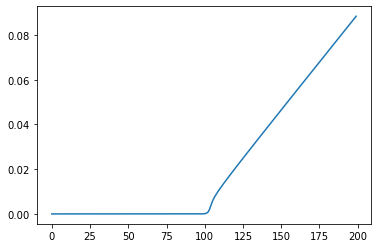

In [33]:
plt.plot(Gamma1D(V,R1,C1,C2,0,Q0,Delta,delta_t,delta_s,T,0.1))

# con clases

In [49]:
R1=10000
R2=1
C1=0.01
C2=0.3
Q0=0.8
Delta=0.60
delta_t=0.60
delta_s=0.10
calc = coulomb(C1, C2, V, 3, Q0,0.1,Delta,delta_t,delta_s)

calc.bcs_delta_t_n_x

{-3: 1,
 -2: array([1.00008195, 1.000082  , 1.00008205, ..., 1.00008205, 1.000082  ,
        1.00008195]),
 -1: 1,
 0: array([1.00008195, 1.000082  , 1.00008205, ..., 1.00008205, 1.000082  ,
        1.00008195]),
 1: 1,
 2: array([1.00008195, 1.000082  , 1.00008205, ..., 1.00008205, 1.000082  ,
        1.00008195]),
 3: 1}

In [48]:

class coulomb():
    
    def __init__(self,R1,R2,C1, C2, V, n, Q0,eta,Delta,delta_t,delta_s) -> None:
        self.R1 = R1
        self.R2 = R2
        self.V = V
        x = np.linspace(-4 * np.max(V), 4 * np.max(V), 7000)
        self.bcs_Delta_n_x = {}
        self.bcs_delta_t_n_x = {}
        self.bcs_delta_s_n_x = {}
        self.bcs_Delta_n_t = {}
        self.bcs_delta_t_n_t = {}
        self.bcs_delta_s_n_t = {}
        self.fermi_t = {}
        for ns in np.arange(-n,n+1):
            a, b = np.meshgrid(x, self.E1(C1, C2, V, ns, Q0))
            t = a + b
            self.bcs_Delta_n_x[ns] = bcs_i(Delta, x, eta, ns)
            self.bcs_delta_t_n_x[ns] = bcs_i(delta_t, x, eta, ns)
            self.bcs_delta_s_n_x[ns] = bcs_i(delta_s, x, eta, ns)
            self.bcs_Delta_n_t[ns] = bcs(Delta, t, eta)
            self.bcs_delta_t_n_t[ns] = bcs(delta_t, t, eta)
            self.bcs_delta_s_n_t[ns] = bcs(delta_s, t, eta)
            self.fermi_t[ns] = self.fermi(T, t)
        self.bcs_Delta_n_x_neg = {}
        self.bcs_delta_t_n_x_neg = {}
        self.bcs_delta_s_n_x_neg = {}
        self.bcs_Delta_n_t_neg = {}
        self.bcs_delta_t_n_t_neg = {}
        self.bcs_delta_s_n_t_neg = {}
        self.fermi_t = {}
        for ns in np.arange(-n,n+1):
            a, b = np.meshgrid(x, self.E1(C1, C2, -V, -ns, -Q0))
            t = a + b
            self.bcs_Delta_n_x_neg[ns] = bcs_i(Delta, x, eta, -ns)
            self.bcs_delta_t_n_x_neg[ns] = bcs_i(delta_t, x, eta, -ns)
            self.bcs_delta_s_n_x_neg[ns] = bcs_i(delta_s, x, eta, -ns)
            self.bcs_Delta_n_t_neg[ns] = bcs(Delta, t, eta)
            self.bcs_delta_t_n_t_neg[ns] = bcs(delta_t, t, eta)
            self.bcs_delta_s_n_t_neg[ns] = bcs(delta_s, t, eta)
            self.fermi_t_neg[ns] = self.fermi(T, t)

    def bcs(self,delta,x,eta):
        if delta<=0.01: 
            return 1
        else:
            return (np.sign(x))*np.imag(np.divide(np.abs(x+eta*1j),np.sqrt(delta-(x+eta*1j)**2)))
        
    def bcs_i(self,delta,x,eta,n):
        if np.mod(n,2)==0:
            if delta<=0.01:
                return 1
            else:
                return (np.sign(x))*np.imag(np.divide(np.abs(x+eta*1j),np.sqrt(delta-(x+eta*1j)**2)))
        else:
            return 1

    def fermi(self,T,x):
        return np.divide(1,1+np.exp(x/T))

    def E1(self,C1,C2,V,n,Q0):
        k=C2/(C1+C2)
        return k*V+(n+Q0-1/2)/(C1+C2)

    def E2(self,C1,C2,V,n,Q0):
        k=C1/(C1+C2)
        return k*V+(n+Q0-1/2)/(C1+C2)


    def Gamma1D(self,n):
        return np.dot(self.bcs_delta_t_n_x[n] * (1 - self.fermi_t[n]), self.bcs_Delta_n_x[n]) / self.R1

    def Gamma2D(self, n):
        return np.dot(self.bcs_delta_t_n_x_neg[n] * (1 - self.fermi_t_neg[n]), self.bcs_Delta_n_x_neg[n]) / self.R2

    def PND(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
        V = self.V
        mn=(Gamma1D(V,R1,C1,C2,-n,Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(-V,R2,C1,C2,n,-Q0,Delta,delta_t,delta_s,T,eta))/(Gamma1D(-V,R1,C1,C2,n+1,-Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(V,R2,C1,C2,-n-1,Q0,Delta,delta_t,delta_s,T,eta))
        en=(Gamma1D(-V,R1,C1,C2,-n,-Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta))/(Gamma1D(V,R1,C1,C2,n+1,Q0,Delta,delta_t,delta_s,T,eta)+Gamma2D(-V,R2,C1,C2,-n-1,-Q0,Delta,delta_t,delta_s,T,eta))
        return en,mn

    def check_pD(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta):
        Vmax=V[-1]
        n=[0]
        while True:
            a=[]
            b=[]
            for i in n:
                an,bn=PND(Vmax,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
                a.append(an[0])
                b.append(bn[0])
            p0=1
            for i in range(len(a)):
                temp=np.zeros(len(a))
                temp[0:i+1]=1
                temp=temp.tolist()
                p0+=np.prod(a,where=temp)+np.prod(b,where=temp)
            p0=1/p0
            pn=p0*np.prod(a)
            p_n=p0*np.prod(b)
            #print(pn,p_n)
            n.append(n[-1]+1)
            if pn<0.0001 and p_n<0.0001:
                #print(len(a))
                break 
        return n[-1]

    def all_pD(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
        a=[]
        b=[]
        for i in range(n):
            an,bn=PND(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
            a.append(an)
            b.append(bn)
        p0=1
        pn=[]
        p_n=[]
        for i in range(n):
            temp=np.zeros(n)
            temp[0:i+1]=1
            temp=temp.tolist()
            temp1=np.full(len(V),1.0)
            temp2=np.full(len(V),1.0)
            for j in range(n):
                if temp[j]<=0.1:
                    pass
                else:
                    temp1*=a[j]       
                    temp2*=b[j]
            p0+=temp1+temp2
            pn.append(temp1)
            p_n.append(temp2)
        p0=1/p0
        pn=p0*np.array(pn)
        p_n=p0*np.array(p_n)
        return p0,pn,p_n

    def G1nD(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
        return Gamma1D(V,R1,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta)-Gamma1D(-V,R1,C1,C2,-n,-Q0,Delta,delta_t,delta_s,T,eta)

    def G2nD(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n):
        return Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta)-Gamma2D(-V,R2,C1,C2,-n,-Q0,Delta,delta_t,delta_s,T,eta)

    def currentD(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta):
        n=check_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta)
        p0,pn,p_n=all_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n)
        I=p0*G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,0)
        for i in range(1,n+1):
            I+=pn[i-1]*G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
            I+=p_n[i-1]*G1nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,-i)
        t=np.gradient(I)
        return t/np.sum(t)


    def currentD2(self,V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta):
        n=check_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta)
        p0,pn,p_n=all_pD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,n)
        I=p0*G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,0)
        for i in range(1,n+1):
            I+=pn[i-1]*G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,i)
            I+=p_n[i-1]*G2nD(V,R1,R2,C1,C2,Q0,Delta,delta_t,delta_s,T,eta,-i)
        t=np.gradient(I)
        return t/np.sum(t)


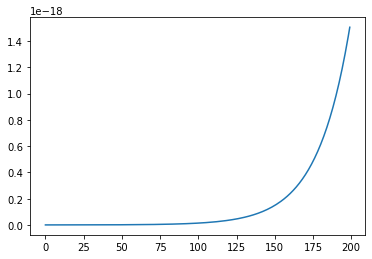

In [45]:
def Gamma1D(V, R1, C1, C2, n, Q0, Delta, delta_t, delta_s, T, eta):
    x = np.linspace(-4 * np.max(V), 4 * np.max(V), 7000)
    a, b = np.meshgrid(x, E1(C1, C2, V, n, Q0))
    t = a + b

    bcs_delta_t = bcs(delta_t, t, eta)
    fermi_t = fermi(T, t)
    bcs_i_delta = bcs_i(Delta, x, eta, n) * fermi(T, x)

    integrand = np.dot(bcs_delta_t * (1 - fermi_t), bcs_i_delta) / R1

    # integral_result = np.trapz(integrand, x)  # Use numerical integration (trapezoidal rule)

    return integrand

def Gamma2D(V, R2, C1, C2, n, Q0, Delta,delta_t, delta_s, T, eta):
    x = np.linspace(-4 * np.max(V), 4 * np.max(V), 7000)
    a, b = np.meshgrid(x, E2(C1, C2, V, -n, -Q0))
    t = a + b

    bcs_delta_s = bcs(delta_s, t, eta)
    fermi_t = fermi(T, t)
    bcs_i_delta = bcs_i(Delta, x, eta, n) * fermi(T, x)

    integrand = np.dot(bcs_delta_s * (1 - fermi_t), bcs_i_delta) / R2

    # integral_result = np.trapz(integrand, x)  # Use numerical integration (trapezoidal rule)

    return integrand


def Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta):
    x=np.linspace(-4*np.max(V),4*np.max(V),7000)
    a,b=np.meshgrid(x,E2(C1,C2,V,-n,-Q0))
    t=a+b
    return np.dot(bcs(delta_s,t,eta)*(1-fermi(T,t)),bcs_i(Delta,x,eta,n)*fermi(T,x))/R2


plt.plot(Gamma2D(V,R1,C1,C2,0,Q0,Delta,delta_t,delta_s,T,0.1))

In [21]:

import cProfile


def Gamma2D(V,R2,C1,C2,n,Q0,Delta,delta_t,delta_s,T,eta):
    x=np.linspace(-4*np.max(V),4*np.max(V),7000)
    a,b=np.meshgrid(x,E2(C1,C2,V,-n,-Q0))
    t=a+b
    return np.dot(bcs(delta_s,t,eta)*(1-fermi(T,t)),bcs_i(Delta,x,eta,n)*fermi(T,x))/R2
V=np.linspace(-15,15,200)
R1=10000
R2=1
C1=0.01
C2=0.3
Q0=0.8
Delta=0.60
delta_t=0.60
delta_s=0.10

T=0.1
cProfile.run('Gamma2D(V,R1,C1,C2,0,Q0,Delta,delta_t,delta_s,T,0.1)')

         122 function calls (118 primitive calls) in 0.251 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.176    0.176    0.176    0.176 1156590689.py:1(bcs)
        2    0.035    0.017    0.035    0.017 1156590689.py:19(fermi)
        1    0.000    0.000    0.000    0.000 1156590689.py:26(E2)
        1    0.000    0.000    0.000    0.000 1156590689.py:7(bcs_i)
        1    0.027    0.027    0.247    0.247 3748487719.py:4(Gamma2D)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(broadcast_arrays)
        1    0.000    0.000    0.001    0.001 <__array_function__ internals>:2(dot)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(imag)
        1    0.000    0.000    0.000    0.000 <__ar

In [16]:
p0,pn,p_n = all_pD(V,R1,R2,C1,C2,Q0,Delta,1.0,0.2,T,0.1,5)

C:\Users\strivini\AppData\Local\Temp/ipykernel_33616/3804422321.py:17: RuntimeWarning: overflow encountered in exp
  return np.divide(1,1+np.exp(x/T))
C:\Users\strivini\AppData\Local\Temp/ipykernel_33616/328246378.py:12: RuntimeWarning: invalid value encountered in multiply
  p_n *= p0


C:\Users\strivini\AppData\Local\Temp/ipykernel_40740/1079702501.py:18: RuntimeWarning: overflow encountered in exp
  return np.divide(1,1+np.exp(x/T))


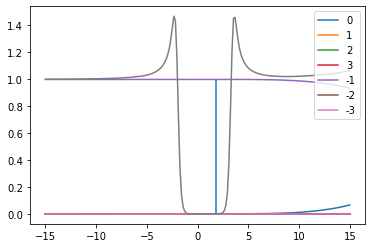

In [19]:
V=np.linspace(-15,15,200)
R1=10000
R2=1
C1=0.01
C2=0.3
Q0=0.8
Delta=0.60
Delta_t=0.60
Delta_s=0.10

T=0.1
z=currentD(V,R1,R2,C1,C2,Q0,Delta,1.0,0.2,T,0.1)
z=z/z[0]
p0,pn,p_n=all_pD(V,R1,R2,C1,C2,Q0,Delta,1.0,0.2,T,0.1,5)
plt.plot(V,p0,label='0')
plt.plot(V,pn[0],label='1')
plt.plot(V,pn[1],label='2')
plt.plot(V,pn[2],label='3')
plt.plot(V,p_n[0],label='-1')
plt.plot(V,p_n[1],label='-2')
plt.plot(V,p_n[3],label='-3')
plt.plot(V,z)
plt.vlines(1/(2*C2)+Delta+1.0+0.2-0.5/(C1+C2),0,1)
#plt.vlines(1/(C2)+Q0,0,1)
plt.legend(loc=1)

In [14]:
import numpy as np

def bcs(delta,x,eta):
    if delta<=0.01: 
        return 1
    else:
        return (np.sign(x))*np.imag(np.divide(np.abs(x+eta*1j),np.sqrt(delta-(x+eta*1j)**2)))
    
def bcs_i(delta,x,eta,n):
    if np.mod(n,2)==0:
        if delta<=0.01:
            return 1
        else:
            return (np.sign(x))*np.imag(np.divide(np.abs(x+eta*1j),np.sqrt(delta-(x+eta*1j)**2)))
    else:
        return 1

def fermi(T, x):
    return 1 / (1 + np.exp(x / T))

def E1(C1, C2, V, n, Q0):
    k = C2 / (C1 + C2)
    return k * V + (n + Q0 - 1/2) / (C1 + C2)

def E2(C1, C2, V, n, Q0):
    k = C1 / (C1 + C2)
    return k * V + (n + Q0 - 1/2) / (C1 + C2)

def calculate_gamma(V, R, E, delta, T, eta, n):
    x = np.linspace(-4 * np.max(V), 4 * np.max(V), 7000)
    a, b = np.meshgrid(x, E)
    t = a + b
    return np.dot(bcs(delta, t, eta) * (1 - fermi(T, t)), bcs(delta, x, eta) * fermi(T, x)) / R

def calculate_pn_p_n(V, R1, R2, C1, C2, Q0, Delta, delta_t, delta_s, T, eta, n):
    a = []
    b = []
    for i in range(n):
        E1_values = E1(C1, C2, V, i, Q0)
        E2_values = E2(C1, C2, V, -i, -Q0)
        gamma1D_values = calculate_gamma(V, R1, E1_values, delta_t, T, eta, i)
        gamma2D_values = calculate_gamma(V, R2, E2_values, delta_s, T, eta, i)
        a.append(gamma1D_values)
        b.append(gamma2D_values)
    temp1 = np.ones(len(V))
    temp2 = np.ones(len(V))
    for j in range(n):
        if a[j].all() > 0.1:
            temp1 *= a[j]
        if b[j].all() > 0.1:
            temp2 *= b[j]
    p0 = 1 / (1 + np.sum(temp1) + np.sum(temp2))
    pn = p0 * temp1
    p_n = p0 * temp2
    return p0, pn, p_n

def calculate_currentD(V, R1, R2, C1, C2, Q0, Delta, delta_t, delta_s, T, eta):
    n = 1
    while True:
        p0, pn, p_n = calculate_pn_p_n(V, R1, R2, C1, C2, Q0, Delta, delta_t, delta_s, T, eta, n)
        I = p0 * (calculate_gamma(V, R1, E1(C1, C2, V, 0, Q0), delta_t, T, eta, 0) -
                  calculate_gamma(-V, R1, E1(C1, C2, -V, 0, Q0), delta_t, T, eta, 0))
        for i in range(1, n+1):
            I += pn[i-1] * (calculate_gamma(V, R1, E1(C1, C2, V, i, Q0), delta_t, T, eta, i) +
                            calculate_gamma(-V, R1, E1(C1, C2, -V, -i, -Q0), delta_t, T, eta, i))
            I += p_n[i-1] * (calculate_gamma(V, R1, E1(C1, C2, V, -i, -Q0), delta_t, T, eta, -i) +
                             calculate_gamma(-V, R1, E1(C1, C2, -V, i, Q0), delta_t, T, eta, -i))
        t = np.gradient(I)
        normalized_t = t / np.sum(t)
        if np.all(np.abs(normalized_t) < 0.0001):
            break
        n += 1
    return normalized_t

# Parameters
V = np.linspace(-15, 15, 200)
R1 = 10000
R2 = 1
C1 = 0.01
C2 = 0.3
Q0 = 0.8
Delta = 0.60
T = 0.1
delta_t = 1.0
delta_s = 0.2
eta = 0.1

# Calculate currentD
z = calculate_currentD(V, R1, R2, C1, C2, Q0, Delta, delta_t, delta_s, T, eta)
z = z / z[0]

C:\Users\strivini\AppData\Local\Temp/ipykernel_46808/565962530.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(x / T))


KeyboardInterrupt: 